# Shifting then Tilting HG(0,0)

***
The effect of a tilt to an already misaligned beam of fundamental mode:

$
	\sum_{n,m} u_{nm}(x,y,0)= u_{00(tilt)}(x,y,0)+ \frac{a}{w_0}u_{10(tilt)}(x,y,0) \; .
$

The first term is verified to be

$
	u_{00 (tilt)} \approx u_{00}(x,y,0) + i  \frac{\pi w_{0} \alpha}{\lambda}u_{10} \; .
$

The second term approximates to

$
		\frac{a}{w_0} u_{tilt(1,0)}(x,y,0) 			 
			\approx  
			\frac{a}{w_0} 
			u_{10} 
			 \left[
			1 + i \frac{2 \pi x \alpha}{\lambda} \right] \;.
$

***
Therefore:

$
		u(x,y,0)=
			\left[
				1+
				i \frac{ \pi a \alpha}{ \lambda}
			\right]
			u_{00}
			+
			\left[
				i  \frac{\pi w_{0} \alpha}{\lambda}
			+
			\frac{a}{w_{0}}
			\right]			
			u_{10}
			+
			i  
				\frac{\sqrt{2} \pi a \alpha}{ \lambda}
			u_{20}	.
$





In [7]:
import PauLisa as pl, numpy as np,plback as plb, matplotlib.pyplot as plt, cmath as cm
from scipy import integrate
from mpmath import quadgl
from numpy import pi as pi
import mpmath as mp

inf=np.inf

In [8]:
#Redefining and naming initial parameters
high_res_plane = pl.Plane(-6e-3,7e-3,1000,-1e-3,1e-3,3) #just used to calculate peak, higher precision
plane = pl.Plane(-2e-3,2e-3,200,-2e-3,2e-3,200)
params = pl.Params(wavelength=1.064e-06, w0=1e-3, z0=0)
a = 100e-6 #shift
alpha = 10e-6 #tilt angle

#wavelength
lam = params.wavelength #wavelength
w0 = params.w0 #spot size
E0 = 1   #E field
k=2*pi/lam

#scales of each mode
c00_ref = 1
c00 = (1+ (np.pi * a * alpha/ lam)*1j)
c10 = ((a/w0)+ (np.pi*w0*alpha/lam)*1j)
c20 = (np.sqrt(2)*np.pi*a*alpha/lam)*1j


print(c00,c10,c20)

#create modes received and reference (rec and ref)
modes_rec = plb.modes((0,0,c00),(1,0,c10),(2,0,c20))
modes_ref = plb.modes((0,0,c00_ref))


#calculate amp. and phase
#result_rec = pl.calculate(params, plane, modes_rec, z=0)
#result_ref = pl.calculate(params,plane,modes_ref, z=0)



(1+0.002952624674426497j) (0.1+0.029526246744264975j) 0.004175641859171396j


In [4]:
alpha_lin = np.linspace(-500e-6,500e-6,21)

def integ_1st_order(alpha_lin):
    
    cr = [0]*len(alpha_lin)
    cl = [0]*len(alpha_lin)
    
    for i in range (len(alpha_lin)):
        print(i)
        
        c00 = (1+ (np.pi * a * alpha_lin[i]/ lam)*1j)
        c10 = ((a/w0)+ (np.pi*w0*alpha_lin[i]/lam)*1j)
        c20 = (np.sqrt(2)*np.pi*a*alpha_lin[i]/lam)*1j

        #create modes received and reference (rec and ref)
        modes_rec = pl.modes((0,0,c00),(1,0,c10),(2,0,c20))
        modes_ref = pl.modes((0,0,c00_ref))

        f = lambda y, x: (pl.amplitude(params,x,y,0,modes_rec))*np.conjugate((pl.amplitude(params,x,y,0,modes_ref)))    
        cr[i] = quadgl(f, [plane.ymin,plane.ymax],[0,plane.xmax])
        cl[i] = quadgl(f, [plane.ymin,plane.ymax],[plane.xmin,0])
       
    return (cr,cl)



In [5]:
cr,cl = integ_1st_order(alpha_lin)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [ ]:
print(cr,cl)

In [6]:
size = len(alpha_lin)
phi_r=[0]*size
phi_l=[0]*size
dws_1st_order = [0]*size
lps_1st_order = [0]*size

for i in range(len(alpha_lin)):
    phi_r[i] = cm.phase(cr[i])
    phi_l[i] = cm.phase(cl[i])

    dws_1st_order[i] = 0.5*(phi_r[i]-phi_l[i])
    lps_1st_order[i] = 0.5*(phi_r[i]+phi_l[i])

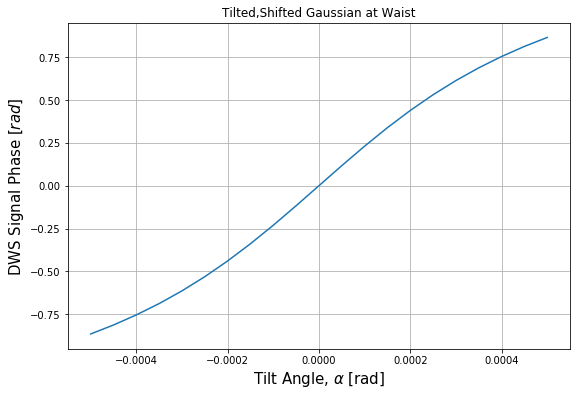

In [12]:
plt.figure(figsize=(9,6))
plt.plot(alpha_lin, dws_1st_order)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted Gaussian at Waist') 

plt.grid()

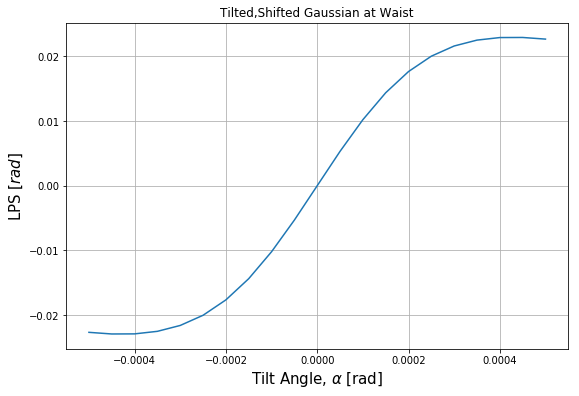

In [14]:
plt.figure(figsize=(9,6))
plt.plot(alpha_lin, lps_1st_order)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'LPS $[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted Gaussian at Waist') 

plt.grid()

In [8]:
alpha_lin = np.linspace(-500e-6,500e-6,11)

def integ_2nd_order(alpha_lin):
    
    cr = [0]*len(alpha_lin)
    cl = [0]*len(alpha_lin)
    
    for i in range (len(alpha_lin)):
        print(i)
        
        c00 = (
                1
                + (1j)*(k*a*alpha_lin[i]/2)
               - (1/2)*alpha_lin[i]**2*(k*w0)**2*(1/4) 
              )
        c10 = (
            (a/w0)
            + (1j)*(k*w0*alpha_lin[i]/2)
            - (1/2)*alpha_lin[i]**2 *(k**2 * a*w0)*(3/4)
        )
        c20 = (
            (1j)*(np.sqrt(2)*k*a*alpha_lin[i]/2)
            -(1/2)*alpha_lin[i]**2 * (k*w0)**2 /(2*np.sqrt(2))
              )
        c30 = (
            -(1/2)*alpha_lin[i]**2*(k**2*a*w0)*(np.sqrt(6)/4)
        )

        #create modes received and reference (rec and ref)
        modes_rec = pl.modes((0,0,c00),(1,0,c10),(2,0,c20),(3,0,c30))
        modes_ref = pl.modes((0,0,c00_ref))

        f = lambda y, x: (pl.amplitude(params,x,y,0,modes_rec))*np.conjugate((pl.amplitude(params,x,y,0,modes_ref)))    
        cr[i] = mp.quad(f, [-inf,inf],[0,inf],maxdegree=10)
        cl[i] = mp.quad(f, [-inf,inf],[-inf,0],maxdegree=10)
       
    return (cr,cl)

In [ ]:
cr_2,cl_2 = integ_2nd_order(alpha_lin)

0


In [ ]:
size = len(alpha_lin)
phi_r2=[0]*size
phi_l2=[0]*size
dws_2nd_order = [0]*size
lps_2nd_order = [0]*size

for i in range(len(alpha_lin)):
    phi_r2[i] = cm.phase(cr_2[i])
    phi_l2[i] = cm.phase(cl_2[i])

    dws_2nd_order[i] = 0.5*(phi_r2[i]-phi_l2[i])
    lps_2nd_order[i] = 0.5*(phi_r2[i]+phi_l2[i])

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(alpha_lin, dws_1st_order)
plt.plot(alpha_lin, dws_2nd_order)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS, $\Delta \phi\;[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted HG00-HG00 at Waist') 

plt.grid()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(alpha_lin, lps_1st_order)
plt.plot(alpha_lin, lps_2nd_order)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'LPS $\;[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted HG00-HG00 at Waist') 

plt.grid()